In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df_1=pd.read_csv('datasetcuaca.csv')

Tampilkan data beserta tipe data

In [5]:
df_1.head()

,City,Temperature (Celsius),Wind Speed (m/s),Latitude,Longitude,Description,Country
0,Paris,10.46,2.06,48.8534,2.3488,clear sky,France
1,Dubai,29.32,3.09,25.2582,55.3047,clear sky,United Arab Emirates
2,Madrid,9.97,3.60,40.4165,-3.7026,clear sky,Spain
3,Tokyo,21.58,2.06,35.6895,139.6917,broken clouds,Japan
4,Amsterdam,8.00,3.58,52.3740,4.8897,clear sky,Netherlands


In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   100 non-null    object 
 1   Temperature (Celsius)  100 non-null    float64
 2   Wind Speed (m/s)       100 non-null    float64
 3   Latitude               100 non-null    float64
 4   Longitude              100 non-null    float64
 5   Description            100 non-null    object 
 6   Country                100 non-null    object 
dtypes: float64(4), object(3)
memory usage: 5.6+ KB


Mengatasi missing values dan identifikasi kolom kategorikal dan kolom numerikal

In [7]:
df_1.isna().sum()

City                     0
Temperature (Celsius)    0
Wind Speed (m/s)         0
Latitude                 0
Longitude                0
Description              0
Country                  0
dtype: int64

In [8]:
kategorikal=['City','Description','Country']
numerikal=['Temperature (Celsius)','Wind Speed (m/s)','Latitude','Longitude']

Standarisasi dengan MinMaxScaler

In [9]:
import scipy
from sklearn.preprocessing import MinMaxScaler
df_1_copy=df_1.copy()
scaler=MinMaxScaler(feature_range=(0,1))
df_1_copy[numerikal]=rescaledX=scaler.fit_transform(df_1_copy[numerikal])
df_1_copy


,City,Temperature (Celsius),Wind Speed (m/s),Latitude,Longitude,Description,Country
0,Paris,0.191057,0.112587,0.887469,0.518360,clear sky,France
1,Dubai,0.888027,0.184615,0.636590,0.689701,clear sky,United Arab Emirates
2,Madrid,0.172949,0.220280,0.797762,0.498780,clear sky,Spain
3,Tokyo,0.601996,0.112587,0.747502,0.962741,broken clouds,Japan
4,Amsterdam,0.100148,0.218881,0.924902,0.526581,clear sky,Netherlands
...,...,...,...,...,...,...,...
95,Punta Cana,0.797487,0.436364,0.565602,0.289434,few clouds,Dominican Republic
96,Guilin,0.693644,0.036364,0.636842,0.867598,clear sky,China
97,Hanoi,0.839246,0.142657,0.591574,0.853215,clear sky,Vietnam
98,Cairo,0.522173,0.292308,0.687673,0.611870,clear sky,Egypt


Correlation Heatmap

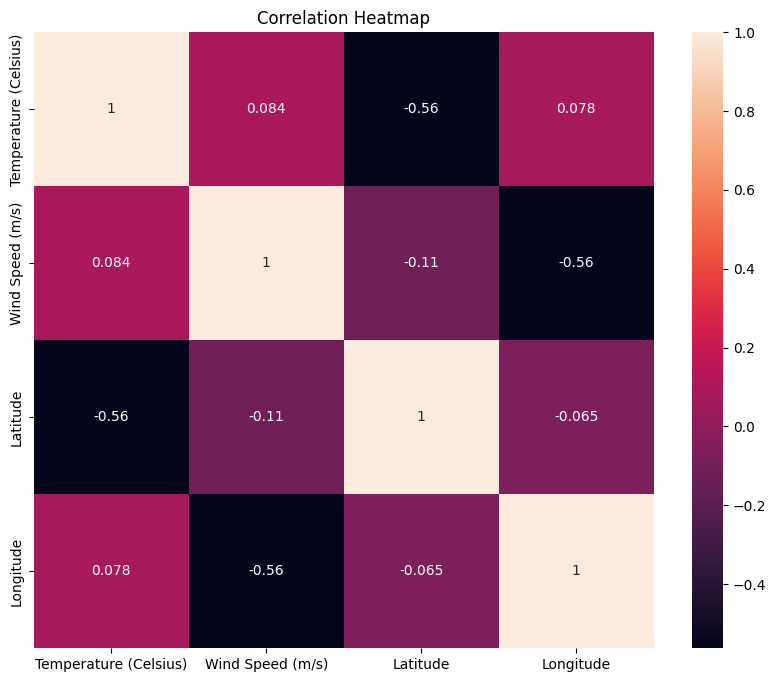

In [10]:
korelasi=df_1_copy.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(korelasi,annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
korelasi

,Temperature (Celsius),Wind Speed (m/s),Latitude,Longitude
Temperature (Celsius),1.000000,0.084105,-0.563209,0.078445
Wind Speed (m/s),0.084105,1.000000,-0.109404,-0.559044
Latitude,-0.563209,-0.109404,1.000000,-0.065362
Longitude,0.078445,-0.559044,-0.065362,1.000000


Algoritma DBSCAN

In [12]:
df_1.ndim

2

In [13]:
kombinasi_fitur=[
    ('Temperature (Celsius)','Wind Speed (m/s)'),
    ('Latitude','Longitude'),
    ('Temperature (Celsius)','Latitude'),
    ('Wind Speed (m/s)','Longitude'),
    ('Wind Speed (m/s)','Latitude'),
    ('Temperature (Celsius)','Longitude')
]

Optimal eps for Temperature (Celsius) and Wind Speed (m/s): 0.12874606701384253


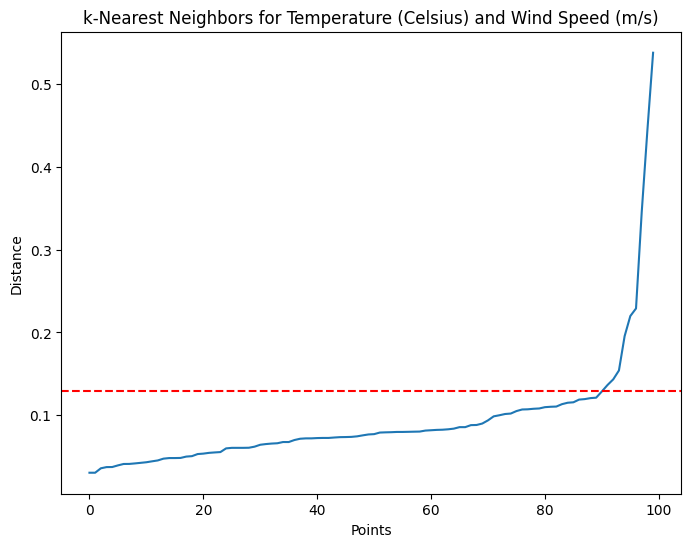

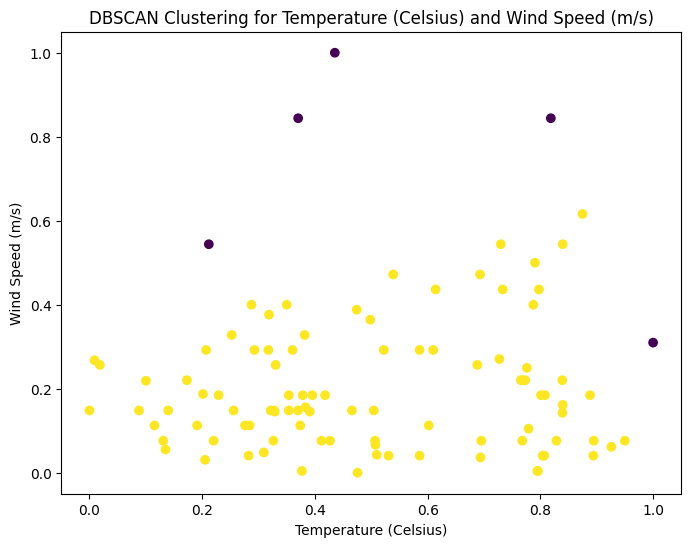

Optimal eps for Latitude and Longitude: 0.11360738172496383


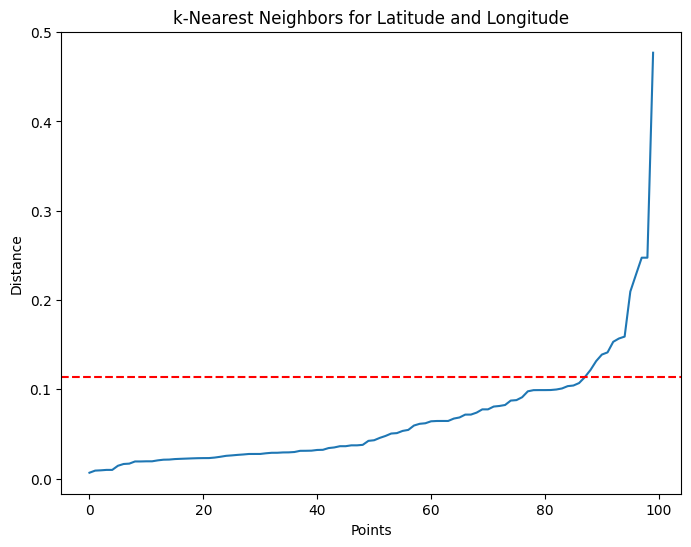

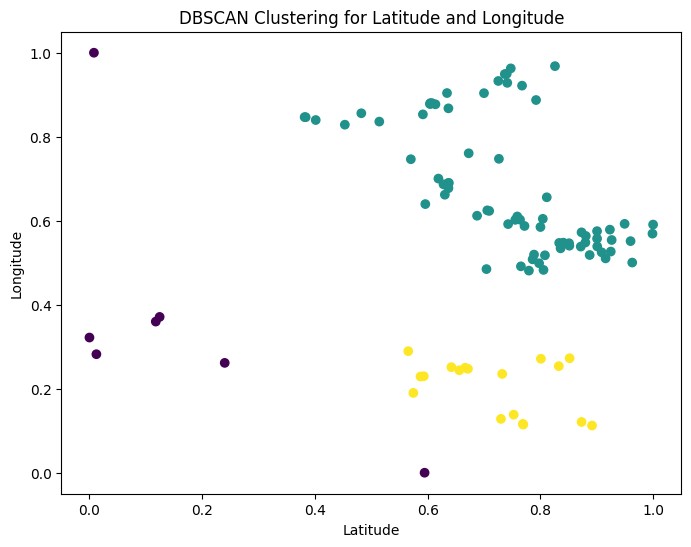

Optimal eps for Temperature (Celsius) and Latitude: 0.14807380805083198


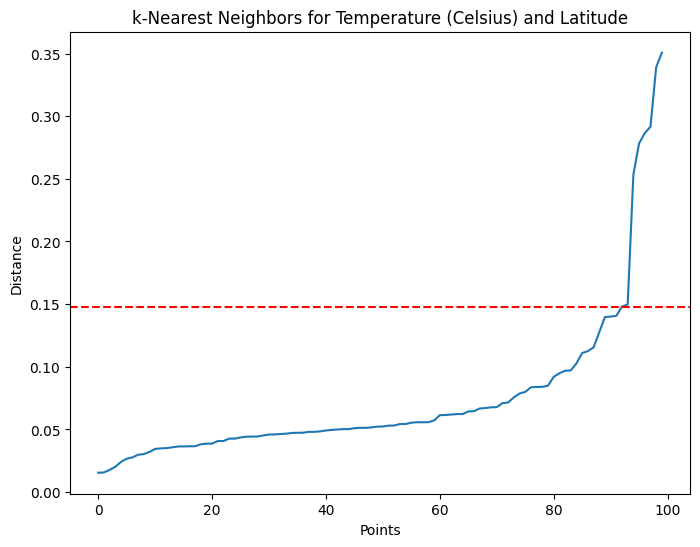

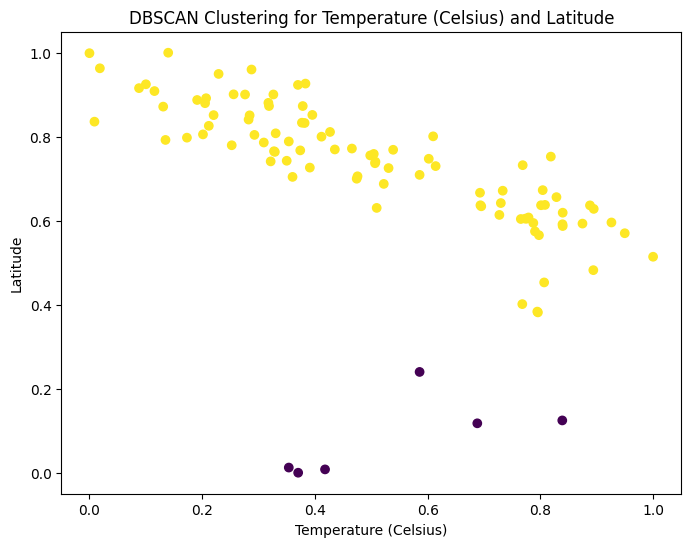

Optimal eps for Wind Speed (m/s) and Longitude: 0.13371821386786498


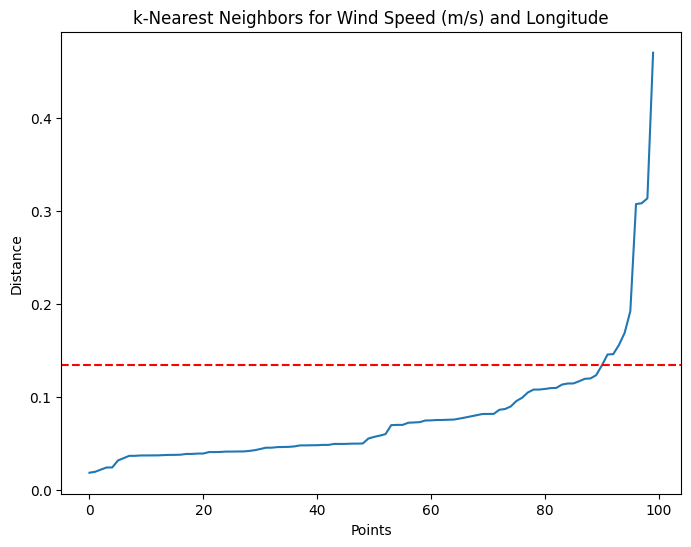

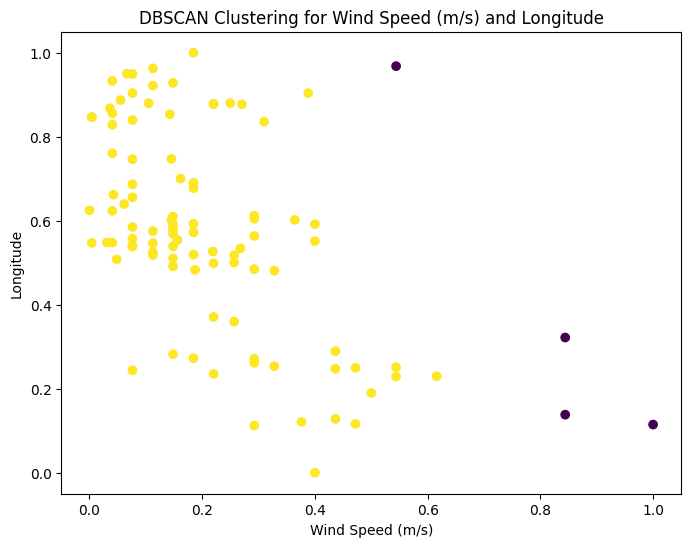

Optimal eps for Wind Speed (m/s) and Latitude: 0.3197333502652194


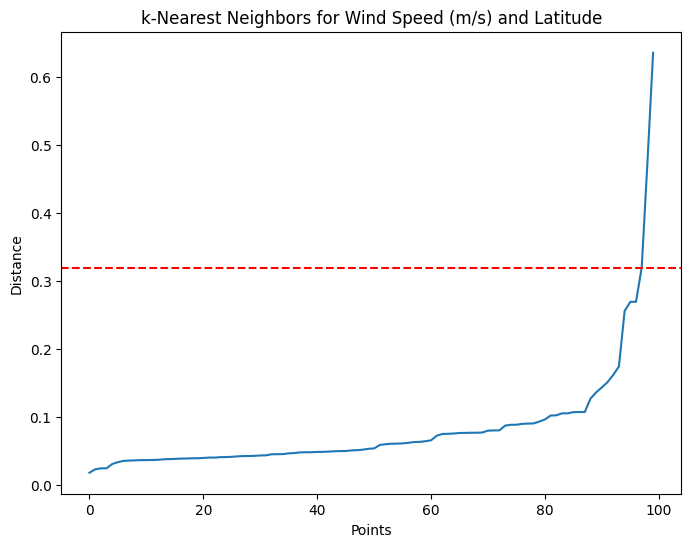

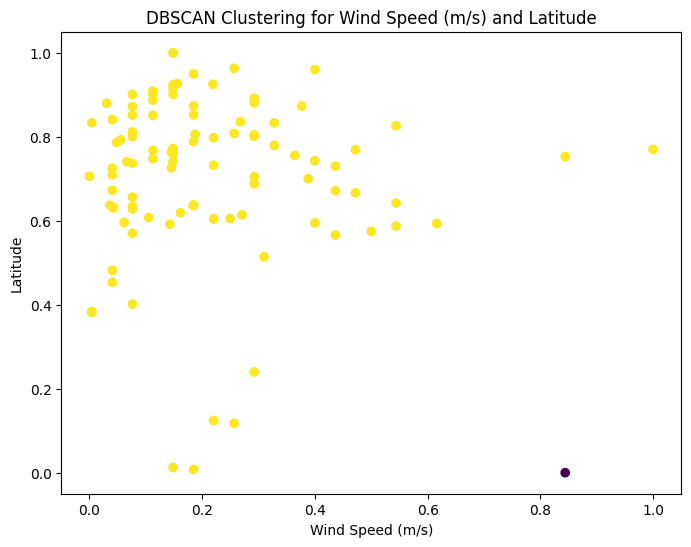

Optimal eps for Temperature (Celsius) and Longitude: 0.17054061984359853


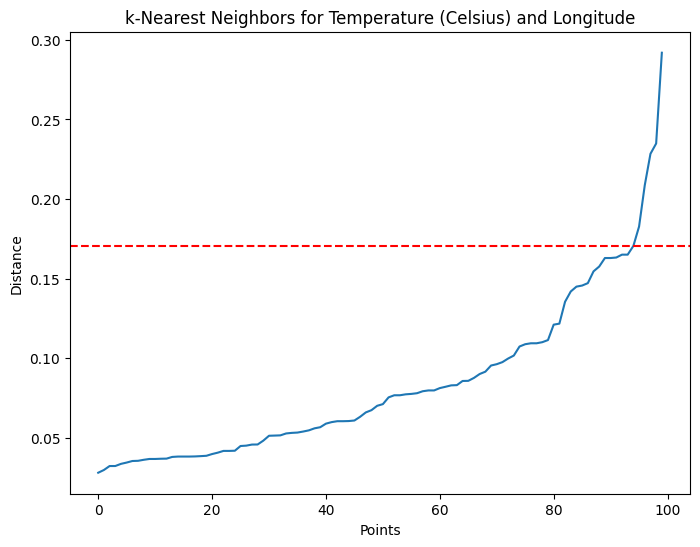

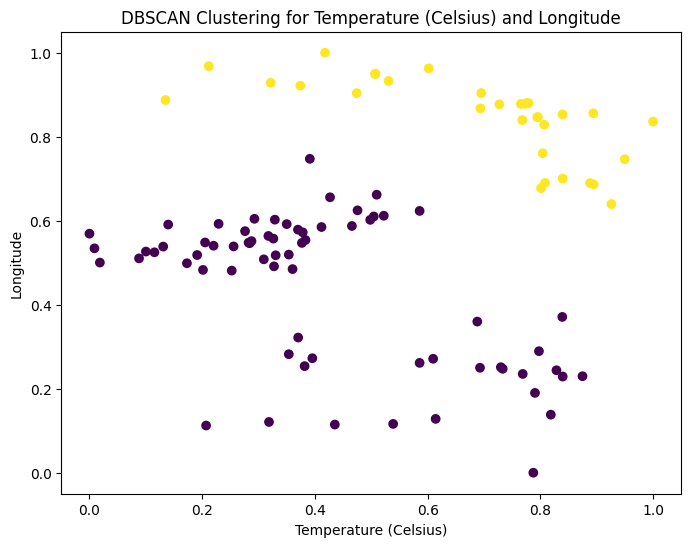

In [14]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator

for feature1, feature2 in kombinasi_fitur:
    X = df_1_copy[[feature1, feature2]].values

    # Determine suitable epsilon using the k-nearest neighbors method
    neighbors = NearestNeighbors(n_neighbors=5)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    distances = np.sort(distances[:, 4], axis=0)

    # Choose optimal eps from the plot (elbow point)
    kneedle = KneeLocator(range(1, len(distances) + 1), distances, curve='convex', direction='increasing')
    optimal_eps = distances[kneedle.elbow]
    print(f'Optimal eps for {feature1} and {feature2}: {optimal_eps}')
    optimal_min_samples = 4 # 2*dim = 2*2 = 4
    
    plt.figure(figsize=(8,6))
    plt.plot(distances)
    plt.title(f'k-Nearest Neighbors for {feature1} and {feature2}')
    plt.axhline(y=optimal_eps, color='r', linestyle='--')
    plt.xlabel('Points')
    plt.ylabel('Distance')
    plt.show()
    
    dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
    df_1_copy[f'{feature1}_{feature2}_cluster'] = dbscan.fit_predict(X)

    # Step 6: Visualize clustering and identify outliers
    plt.figure(figsize=(8,6))
    plt.scatter(X[:, 0], X[:, 1], c=df_1_copy[f'{feature1}_{feature2}_cluster'], cmap='viridis')
    plt.title(f'DBSCAN Clustering for {feature1} and {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

In [15]:
df_1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   City                                            100 non-null    object 
 1   Temperature (Celsius)                           100 non-null    float64
 2   Wind Speed (m/s)                                100 non-null    float64
 3   Latitude                                        100 non-null    float64
 4   Longitude                                       100 non-null    float64
 5   Description                                     100 non-null    object 
 6   Country                                         100 non-null    object 
 7   Temperature (Celsius)_Wind Speed (m/s)_cluster  100 non-null    int64  
 8   Latitude_Longitude_cluster                      100 non-null    int64  
 9   Temperature (Celsius)_Latitude_cluster      

In [16]:
df_1_copy['Temperature (Celsius)_Wind Speed (m/s)_cluster'].value_counts()

Temperature (Celsius)_Wind Speed (m/s)_cluster
 0    95
-1     5
Name: count, dtype: int64

In [17]:
df_1_copy['Latitude_Longitude_cluster'].value_counts()

Latitude_Longitude_cluster
 0    75
 1    18
-1     7
Name: count, dtype: int64

In [18]:
df_1_copy['Temperature (Celsius)_Latitude_cluster'].value_counts()

Temperature (Celsius)_Latitude_cluster
 0    94
-1     6
Name: count, dtype: int64

In [19]:
df_1_copy['Wind Speed (m/s)_Longitude_cluster'].value_counts()

Wind Speed (m/s)_Longitude_cluster
 0    96
-1     4
Name: count, dtype: int64

In [20]:
df_1_copy['Wind Speed (m/s)_Latitude_cluster'].value_counts()

Wind Speed (m/s)_Latitude_cluster
 0    99
-1     1
Name: count, dtype: int64

In [21]:
df_1_copy['Temperature (Celsius)_Longitude_cluster'].value_counts()

Temperature (Celsius)_Longitude_cluster
0    68
1    32
Name: count, dtype: int64

Dari interpretasi di atas bisa terlihat bahwa outlier yang terdeteksi akan dimasukkan dalam cluster -1

Menambahkan label dan menampilkan cluster

In [22]:
df_1_copy.head()

,City,Temperature (Celsius),Wind Speed (m/s),Latitude,Longitude,Description,Country,Temperature (Celsius)_Wind Speed (m/s)_cluster,Latitude_Longitude_cluster,Temperature (Celsius)_Latitude_cluster,Wind Speed (m/s)_Longitude_cluster,Wind Speed (m/s)_Latitude_cluster,Temperature (Celsius)_Longitude_cluster
0,Paris,0.191057,0.112587,0.887469,0.518360,clear sky,France,0,0,0,0,0,0
1,Dubai,0.888027,0.184615,0.636590,0.689701,clear sky,United Arab Emirates,0,0,0,0,0,1
2,Madrid,0.172949,0.220280,0.797762,0.498780,clear sky,Spain,0,0,0,0,0,0
3,Tokyo,0.601996,0.112587,0.747502,0.962741,broken clouds,Japan,0,0,0,0,0,1
4,Amsterdam,0.100148,0.218881,0.924902,0.526581,clear sky,Netherlands,0,0,0,0,0,0


Evaluasi dengan Silhouette Score

In [23]:
from sklearn.metrics import silhouette_score

for feature1, feature2 in kombinasi_fitur:
    labels = df_1_copy[f'{feature1}_{feature2}_cluster']
    if len(set(labels)) > 1:
        score = silhouette_score(df_1_copy[[feature1, feature2]], labels)
        print(f'Silhouette Score for {feature1} and {feature2}: {score}')
    else:
        print(f'Cannot compute Silhouette Score for {feature1} and {feature2} with only one cluster')

Silhouette Score for Temperature (Celsius) and Wind Speed (m/s): 0.42750865945571953
Silhouette Score for Latitude and Longitude: 0.4904150607938204
Silhouette Score for Temperature (Celsius) and Latitude: 0.5020987047194627
Silhouette Score for Wind Speed (m/s) and Longitude: 0.5275825540000872
Silhouette Score for Wind Speed (m/s) and Latitude: 0.6471404180256699
Silhouette Score for Temperature (Celsius) and Longitude: 0.4364425914411419


Hierarchical Clustering

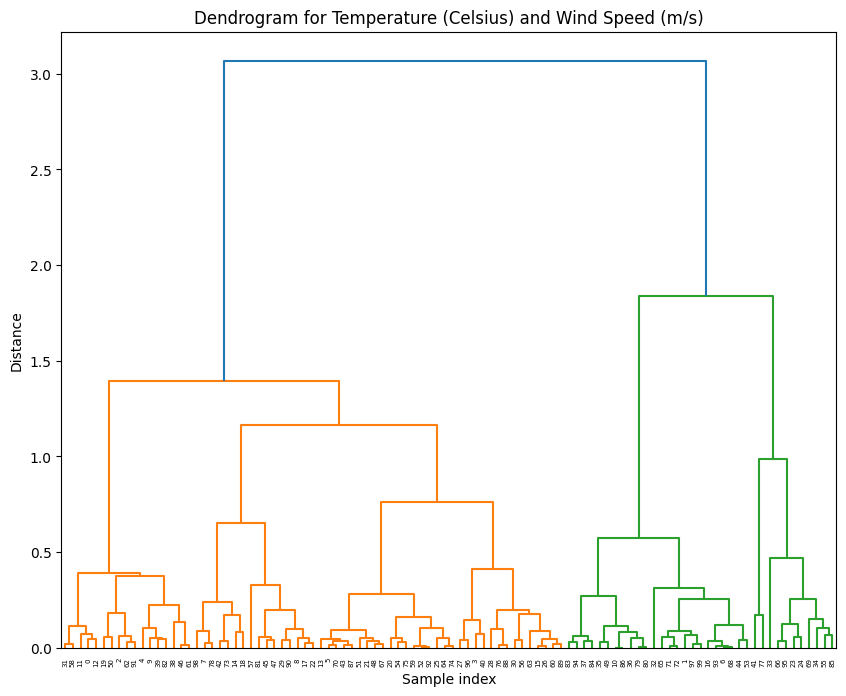

Optimal number of clusters: 3


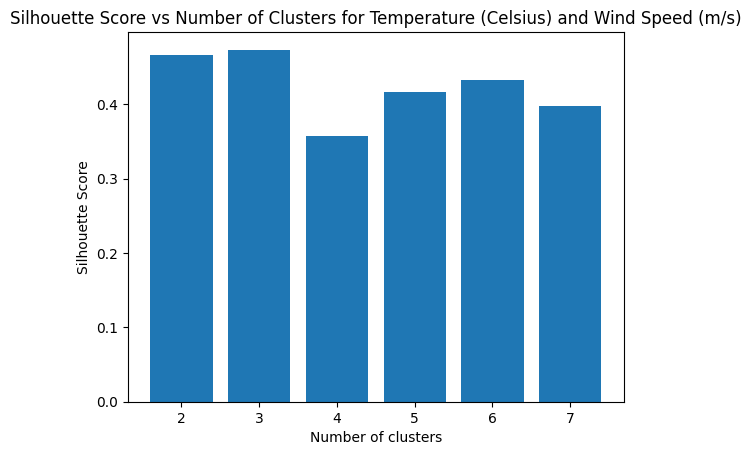

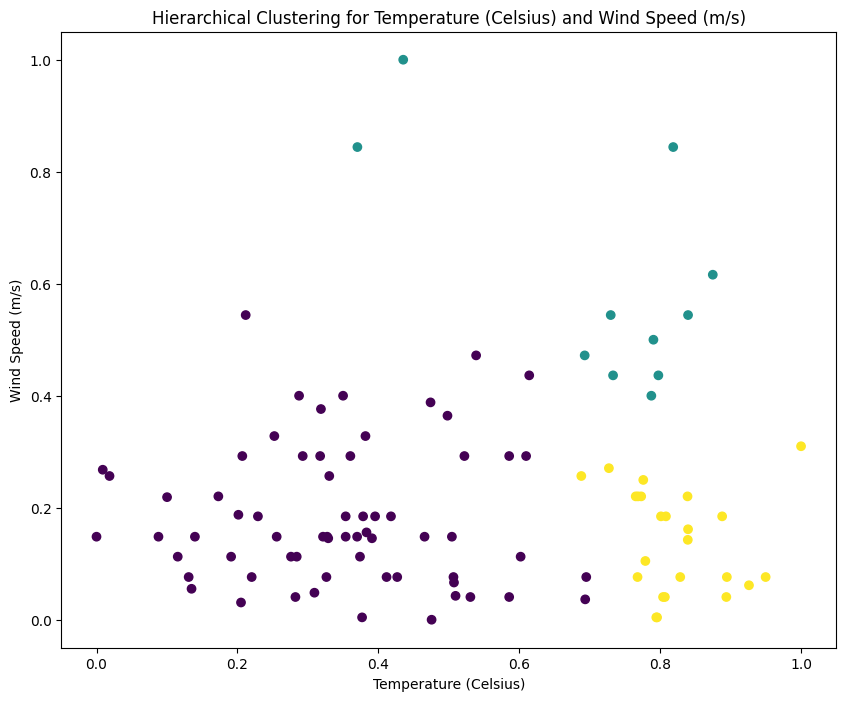

Silhouette Score for Hierarchical Clustering of Temperature (Celsius) and Wind Speed (m/s): 0.47311836349913655


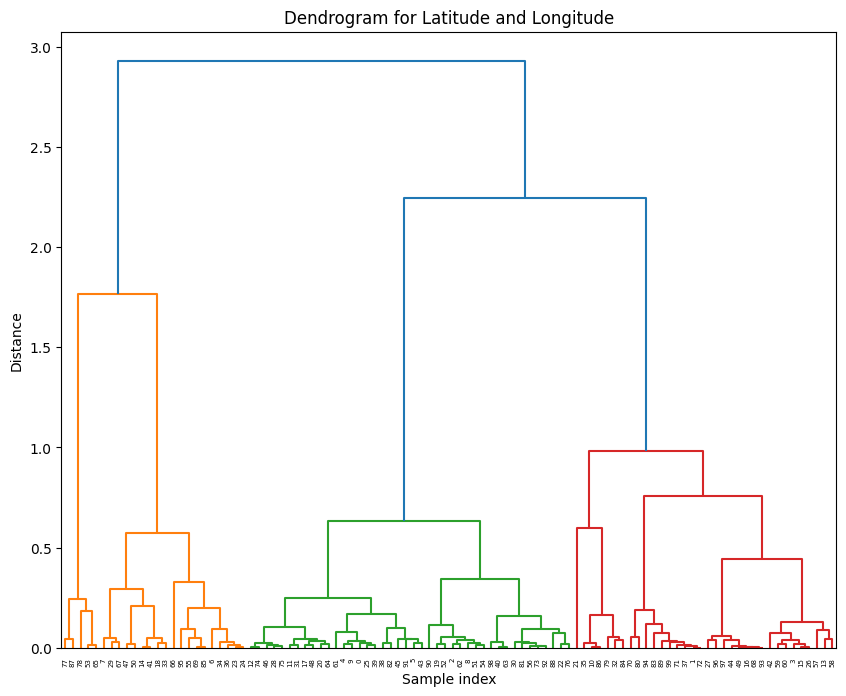

Optimal number of clusters: 4


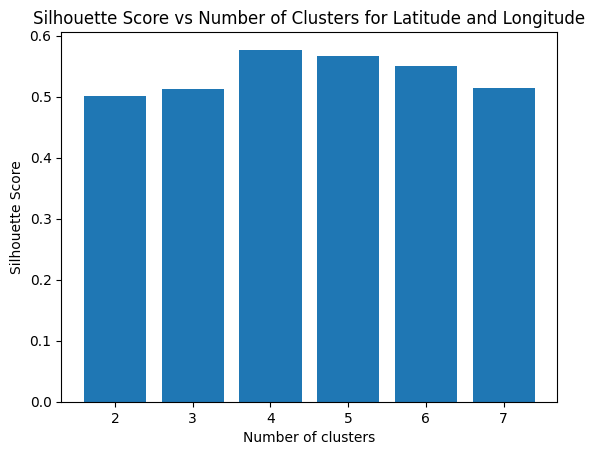

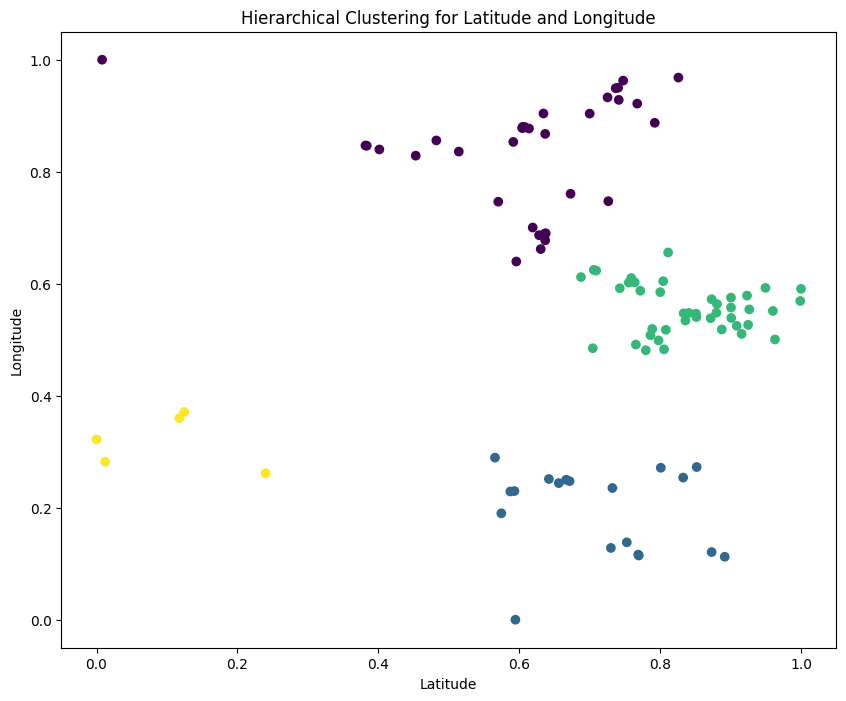

Silhouette Score for Hierarchical Clustering of Latitude and Longitude: 0.5770311917169475


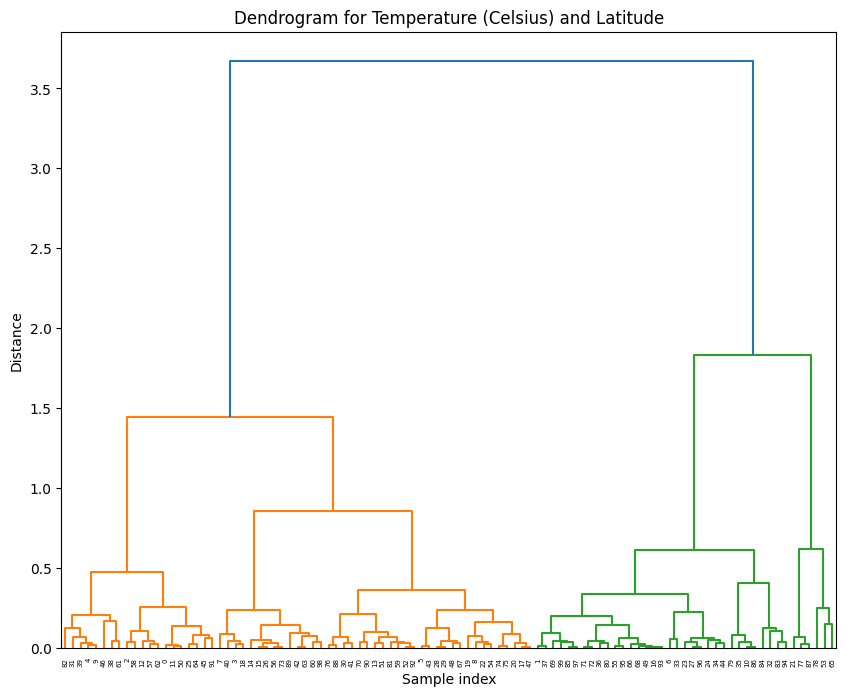

Optimal number of clusters: 3


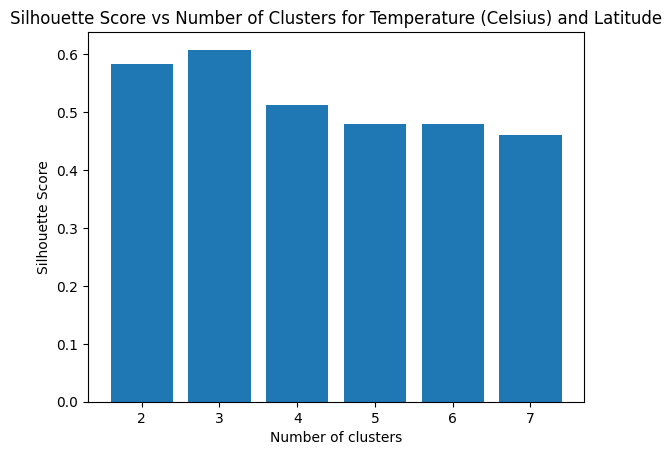

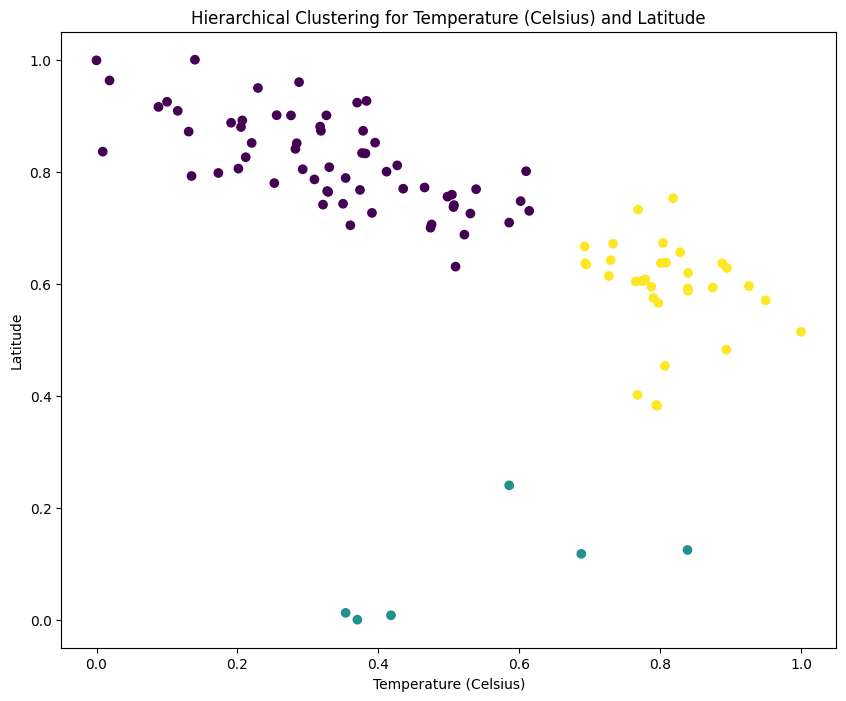

Silhouette Score for Hierarchical Clustering of Temperature (Celsius) and Latitude: 0.6077853847559763


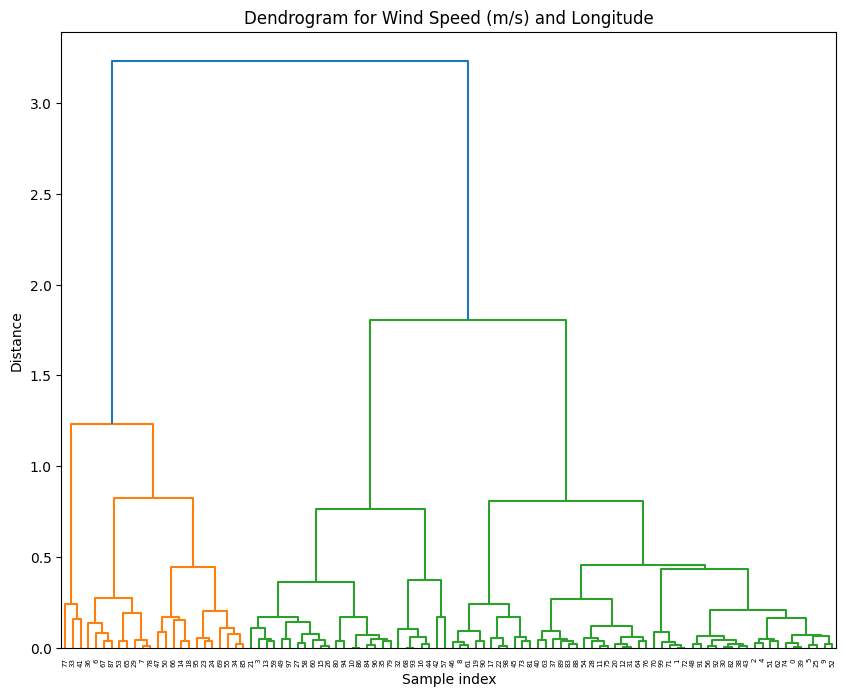

Optimal number of clusters: 2


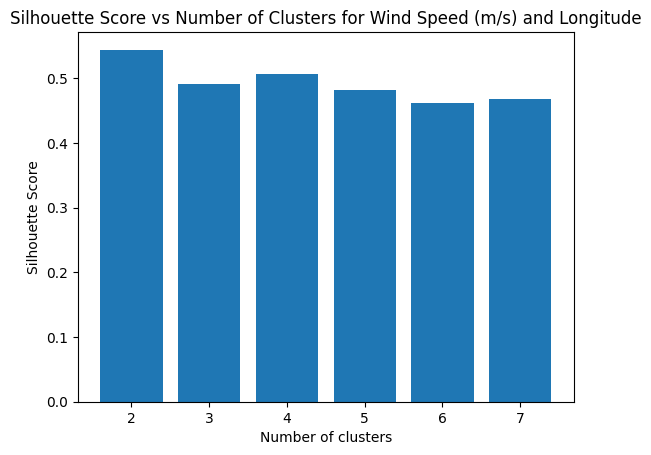

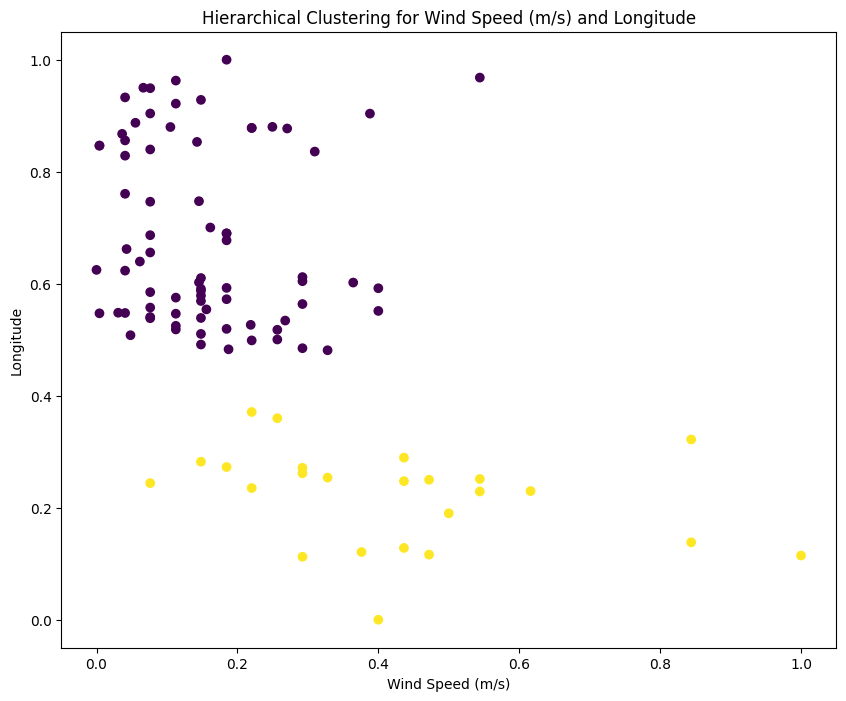

Silhouette Score for Hierarchical Clustering of Wind Speed (m/s) and Longitude: 0.5442116569163583


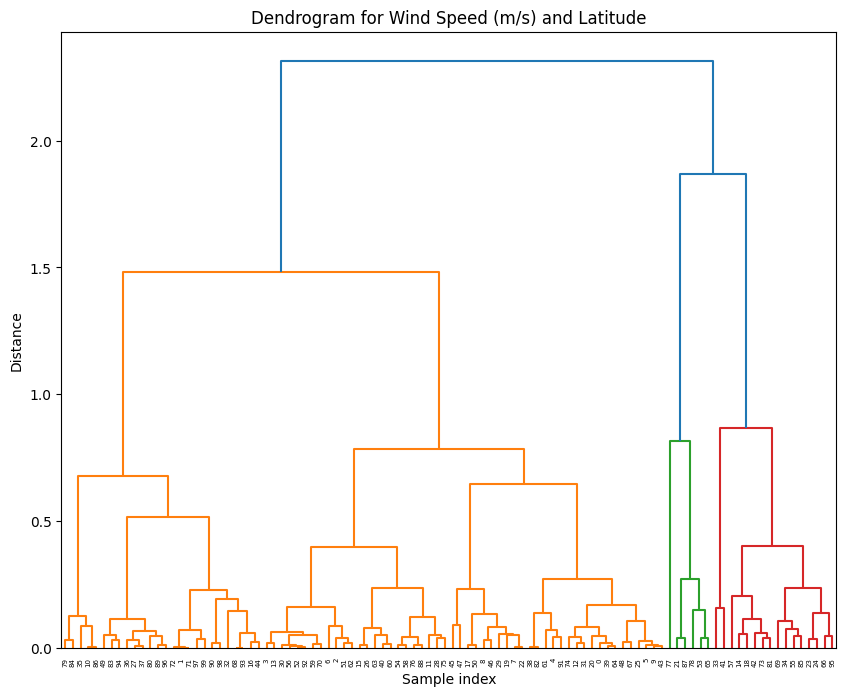

Optimal number of clusters: 2


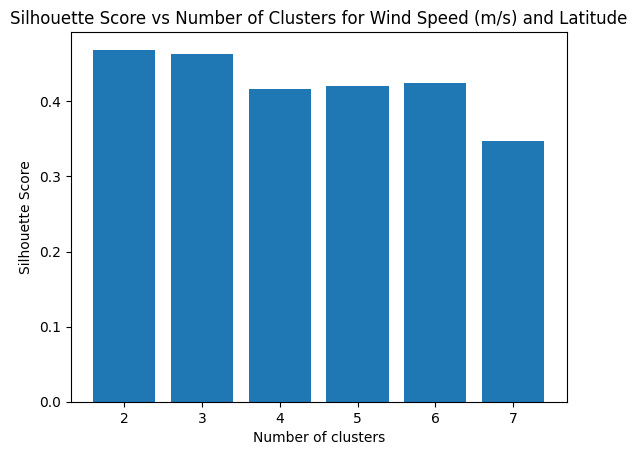

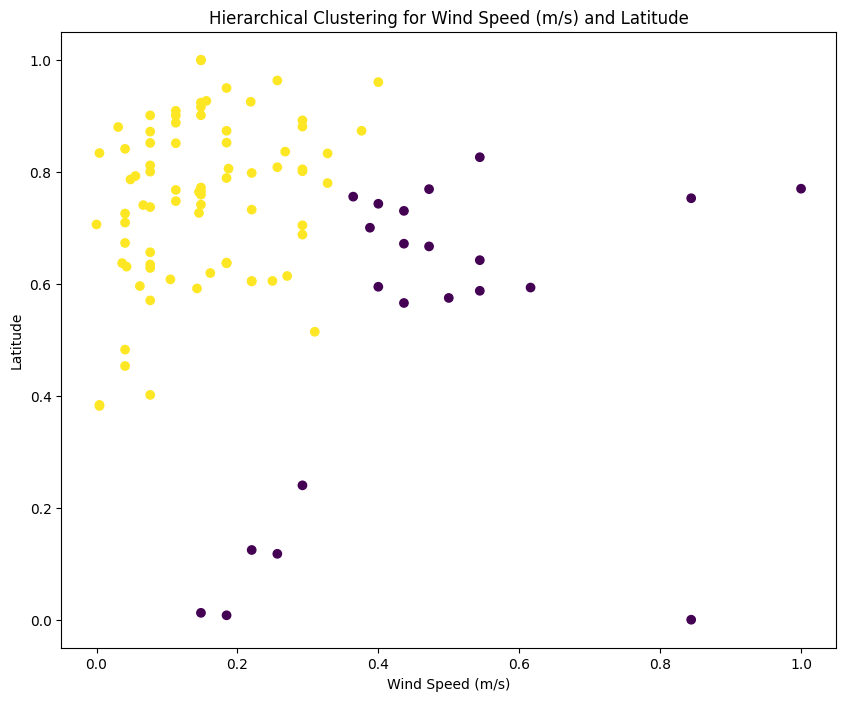

Silhouette Score for Hierarchical Clustering of Wind Speed (m/s) and Latitude: 0.46865725110222844


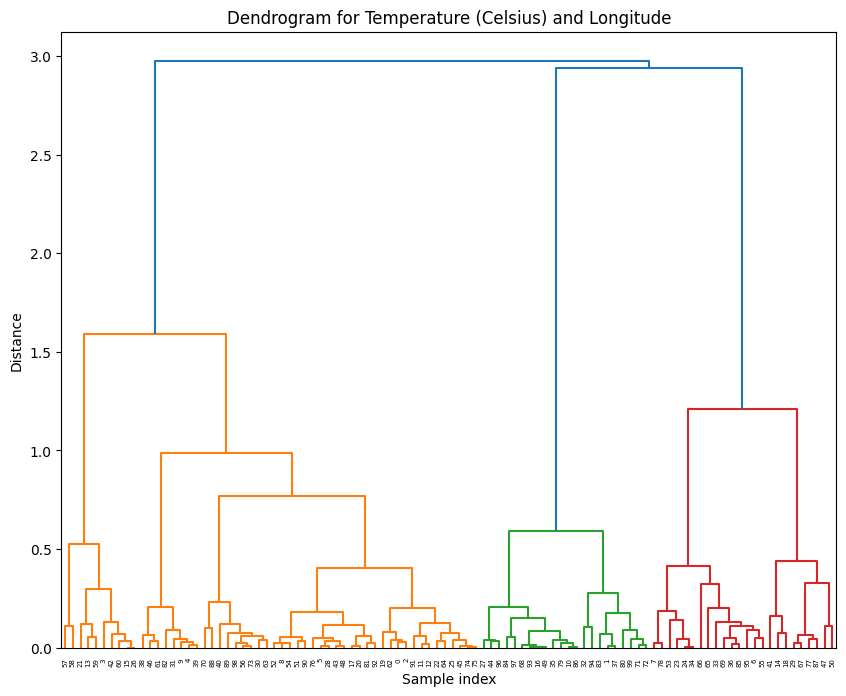

Optimal number of clusters: 5


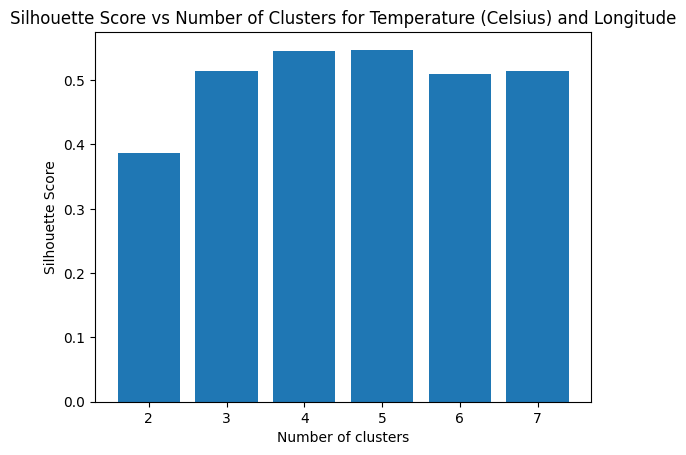

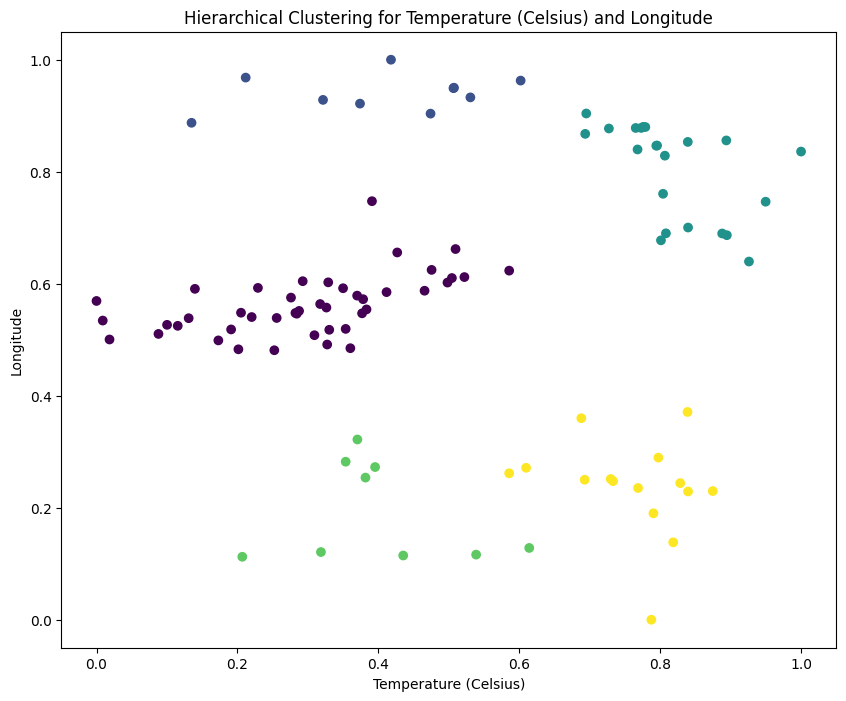

Silhouette Score for Hierarchical Clustering of Temperature (Celsius) and Longitude: 0.5473547147044184


In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming kombinasi_fitur is a list of tuples containing pairs of features
for feature1, feature2 in kombinasi_fitur:
    X = df_1_copy[[feature1, feature2]].values

    # Hierarchical clustering
    Z = linkage(X, 'ward')
    plt.figure(figsize=(10, 8))
    dendrogram(Z)
    plt.title(f'Dendrogram for {feature1} and {feature2}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

    silhouette_scores = []

    # Calculate silhouette scores for different numbers of clusters
    for n_cluster in range(2, 8):
        hierarchical = AgglomerativeClustering(n_clusters=n_cluster)
        cluster_labels = hierarchical.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, cluster_labels))

    # Determine the optimal number of clusters
    num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts from 2
    print(f"Optimal number of clusters: {num_clusters}")

    # Plotting a bar graph to compare the results
    k = list(range(2, 8))
    plt.bar(k, silhouette_scores)
    plt.xlabel('Number of clusters', fontsize=10)
    plt.ylabel('Silhouette Score', fontsize=10)
    plt.title(f'Silhouette Score vs Number of Clusters for {feature1} and {feature2}')
    plt.xticks(k)
    plt.show()

    # Perform clustering with the optimal number of clusters
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters)
    df_1_copy[f'{feature1}_{feature2}_hcluster'] = hierarchical.fit_predict(X)

    # Visualize clustering
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:, 0], X[:, 1], c=df_1_copy[f'{feature1}_{feature2}_hcluster'], cmap='viridis')
    plt.title(f'Hierarchical Clustering for {feature1} and {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

    # Evaluate clustering using Silhouette Score
    score = silhouette_score(X, df_1_copy[f'{feature1}_{feature2}_hcluster'])
    print(f'Silhouette Score for Hierarchical Clustering of {feature1} and {feature2}: {score}')

Evaluasi Silhouette Score untuk DBSCAN <br>
Silhouette Score for Temperature (Celsius) and Wind Speed (m/s): 0.42750865945571953 <br>
Silhouette Score for Latitude and Longitude: 0.4904150607938204<br>
Silhouette Score for Temperature (Celsius) and Latitude: 0.5020987047194627<br>
Silhouette Score for Wind Speed (m/s) and Longitude: 0.5275825540000872<br>
Silhouette Score for Wind Speed (m/s) and Latitude: 0.6471404180256699<br>
Silhouette Score for Temperature (Celsius) and Longitude: 0.4364425914411418<br>

Evaluasi Silhouette Score untuk Hierarchical Clustering <br>
Silhouette Score for Hierarchical Clustering of Temperature (Celsius) and Wind Speed (m/s): 0.47311836349913655 <br>
Silhouette Score for Hierarchical Clustering of Latitude and Longitude: 0.5770311917169475 <br>
Silhouette Score for Hierarchical Clustering of Temperature (Celsius) and Latitude: 0.6077853847559764 <br>
Silhouette Score for Hierarchical Clustering of Wind Speed (m/s) and Longitude: 0.5442116569163583 <br>
Silhouette Score for Hierarchical Clustering of Wind Speed (m/s) and Latitude: 0.46865725110222856 <br>
Silhouette Score for Hierarchical Clustering of Temperature (Celsius) and Longitude: 0.5473547147044185 <br>

Terlihat bahwa nilai Silhouette dari masing2 Hierarchical Clustering mayoritas lebih besar daripada DBSCAN kecuali untuk Clustering of Wind Speed (m/s) and Latitude

Soal No.2

In [26]:
df_2=pd.read_csv('datasetpenyakitjantung.csv')
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [27]:
df_2.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [28]:
df_2['ca'].value_counts()

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [29]:
valid_ca=[0,1,2,3]
valid_thal=[1,2,3]

In [30]:
filtered_df2=df_2[(df_2['ca'].isin(valid_ca)) & (df_2['thal'].isin(valid_thal))]

In [31]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [32]:
df_2['thal'].value_counts()

thal
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [33]:
df_2[(df_2['ca']!=0)  & (df_2['ca']!=1)  & (df_2['ca']!=2)  & (df_2['ca']!=3)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [34]:
df_2[(df_2['thal']!=1)  & (df_2['thal']!=2)  & (df_2['thal']!=3)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [35]:
df_2.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [36]:
filtered_df2['sex'] = filtered_df2['sex'].replace({0: 'female', 1: 'male'})
filtered_df2['cp'] = filtered_df2['cp'].replace({0: 'typical angina', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'asymptomatic'})
filtered_df2['fbs'] = filtered_df2['fbs'].replace({0: '< 120 mg/dl', 1: '> 120 mg/dl'})
filtered_df2['restecg'] = filtered_df2['restecg'].replace({0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'})
filtered_df2['exang'] = filtered_df2['exang'].replace({0: 'no', 1: 'yes'})
filtered_df2['slope'] = filtered_df2['slope'].replace({0: 'upsloping', 1: 'flat', 2: 'downsloping'})
filtered_df2['thal'] = filtered_df2['thal'].replace({2: 'normal', 1: 'fixed defect', 3: 'reversable defect'})

In [37]:
filtered_df2.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,asymptomatic,145,233,> 120 mg/dl,normal,150,no,2.3,upsloping,0,fixed defect,1
1,37,male,non-anginal pain,130,250,< 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,normal,1
2,41,female,atypical angina,130,204,< 120 mg/dl,normal,172,no,1.4,downsloping,0,normal,1
3,56,male,atypical angina,120,236,< 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,normal,1
4,57,female,typical angina,120,354,< 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,normal,1
5,57,male,typical angina,140,192,< 120 mg/dl,ST-T wave abnormality,148,no,0.4,flat,0,fixed defect,1
6,56,female,atypical angina,140,294,< 120 mg/dl,normal,153,no,1.3,flat,0,normal,1
7,44,male,atypical angina,120,263,< 120 mg/dl,ST-T wave abnormality,173,no,0.0,downsloping,0,reversable defect,1
8,52,male,non-anginal pain,172,199,> 120 mg/dl,ST-T wave abnormality,162,no,0.5,downsloping,0,reversable defect,1
9,57,male,non-anginal pain,150,168,< 120 mg/dl,ST-T wave abnormality,174,no,1.6,downsloping,0,normal,1


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [39]:
X = filtered_df2.drop('target', axis=1)
y = filtered_df2['target']

In [40]:
X = pd.get_dummies(X, drop_first=True)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

In [43]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

In [44]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")

evaluate_model(y_test, dt_y_pred, "Decision Tree")
evaluate_model(y_test, nb_y_pred, "Naive Bayes")


Evaluation Metrics for Decision Tree:
Confusion Matrix:
[[22  6]
 [ 6 26]]
Accuracy: 0.80
Precision: 0.81
Recall: 0.81

Evaluation Metrics for Naive Bayes:
Confusion Matrix:
[[25  3]
 [ 8 24]]
Accuracy: 0.82
Precision: 0.89
Recall: 0.75


Bisa terlihat bahwa dari segi akurasi pada Naive Bayes lebih besar daripada Decision Tree

Dari segi presisi juga Naive bayes memiliki skor yang lebih tinggi

Namun pada segi Recall dapat dilihat bahwa persentase prediksi positif yang benar dari keseluruhan prediksi positif lebih baik menggunakan Decision Tree

Pada Confusion Matriks

TP : Jumlah prediksi positif yang benar lebih banyak NB
TN : Jumlah prediksi negatif yang benar lebih banyak DT
FP : Jumlah prediksi positif yang salah lebih sedikit DT
FN : Jumlah prediksi negatif yang salah lebih sedikit NB

Naive Bayes mungkin lebih diinginkan jika tujuan utama adalah untuk meminimalkan false positives (misalnya, menghindari memberikan diagnosis positif secara salah kepada pasien yang tidak memiliki penyakit jantung).

Decision Tree mungkin lebih diinginkan jika tujuan utama adalah untuk meminimalkan false negatives (misalnya, memastikan bahwa semua pasien yang memiliki penyakit jantung terdeteksi)

Pilihan model tergantung pada prioritas dalam aplikasi nyata. Jika kesalahan tipe II (false negatives) lebih kritis, Decision Tree akan lebih cocok. Jika kesalahan tipe I (false positives) lebih kritis, Naive Bayes lebih disukai.